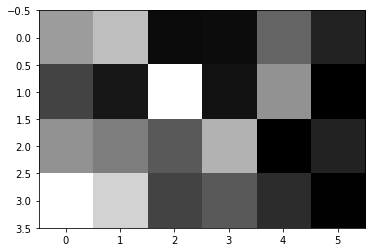

In [1]:
#create image using 2D array
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Create a 2D array representing pixel values (grayscale)
array = np.array([
    [156, 190, 10, 12,100,34],
    [67, 23, 255, 18,146,0],
    [145, 125, 89, 178,0,34],
    [255, 210, 67, 89,45,1]
], dtype=np.uint8)

# Step 3: Use matplotlib to plot the image
plt.imshow(array, cmap='gray', interpolation='nearest')

# Display the image
plt.show()

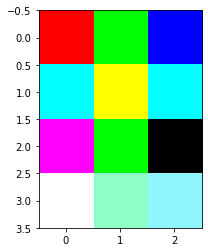

In [24]:
#create image using 2D array
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Create a 2D array representing pixel values (grayscale)
array = np.array([
    [[255,0,0],[0,255,0],[0,0,255]],
    [[0,255,255],[255,255,0],[0,255,255]],
    [[255,0,255],[0,255,0],[0,0,0]],
    [[255,255,255],[143,255,200],[145,245,255]],
], dtype=np.uint8)

# Step 3: Use matplotlib to plot the image
plt.imshow(array, cmap='gray', interpolation='nearest')

# Display the image
plt.show()

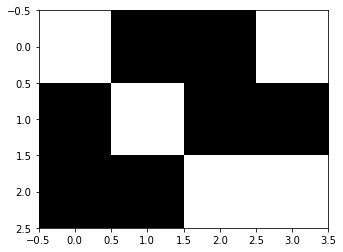

In [39]:
#create image using 2D array
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Create a 2D array representing pixel values (grayscale)
array = np.array([
    [255,0,0,255],
    [0,255,0,0],
    [0,0,255,255],
], dtype=np.uint8)

# Step 3: Use matplotlib to plot the image
plt.imshow(array, cmap='gray', interpolation='nearest')

# Display the image
plt.show()

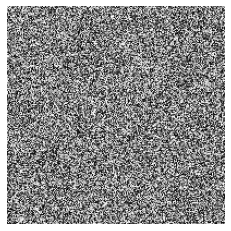

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Create a random 2D array
width = 200
height = 200
array = np.random.randint(0, 255, (height, width), dtype=np.uint8)

# Display the image
plt.imshow(array, cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()


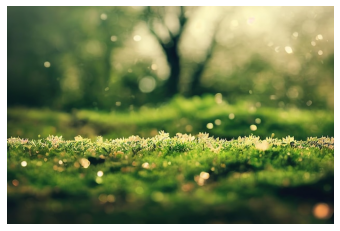

In [6]:
#read image using url
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# URL of the image
url = 'https://img.freepik.com/premium-photo/bright-green-meadow-with-grass_124507-13850.jpg'
# Step 1: Fetch the image from the URL
response = requests.get(url)
img_data = response.content

# Step 2: Open the image using PIL
img = Image.open(BytesIO(img_data))

# Step 3: Convert the image to a NumPy array (if needed)
# img_array = np.array(img)

# Step 4: Display the image using matplotlib
plt.imshow(img_array)
plt.axis('off')  # Hide axes
plt.show()


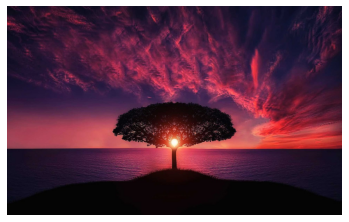

In [7]:
#read image using url
import requests
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

# Example URL of an image
url = 'https://cdn.pixabay.com/photo/2015/04/23/22/00/tree-736885_1280.jpg'
# Download the image
response = requests.get(url)
response.raise_for_status()

# Open the image
image = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()


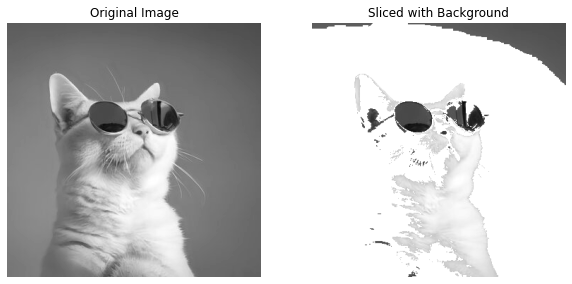

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('cat1.jpg', cv2.IMREAD_GRAYSCALE)

# Define the range for gray level slicing in the foreground
min_gray = 100
max_gray = 200

# Apply gray level slicing to the with background
sliced_image_with_bg = image.copy()
sliced_image_with_bg[(image >= min_gray) & (image <= max_gray)] = 255  # Set the foreground pixels to white

# Plot the original and processed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Sliced with Background')
plt.imshow(sliced_image_with_bg, cmap='gray')
plt.axis('off')

plt.show()


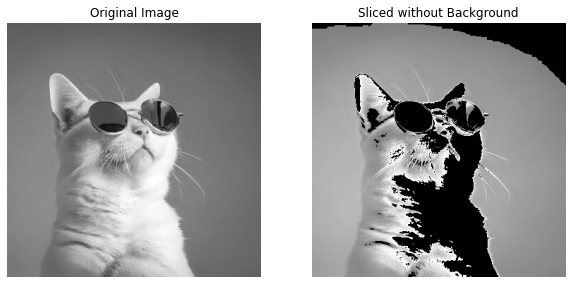

In [16]:
#slice without background
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('cat1.jpg', cv2.IMREAD_GRAYSCALE)

# Define the range for gray level slicing in the foreground
min_gray = 100
max_gray = 200

# Apply gray level slicing to the foreground
sliced_image_without_bg = image.copy()
sliced_image_without_bg[(image < min_gray) | (image > max_gray)] = 0  # Set the background pixels to black

# Plot the original and processed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Sliced without Background')
plt.imshow(sliced_image_without_bg, cmap='gray')
plt.axis('off')

plt.show()


Enter an image file name: cat1.jpg


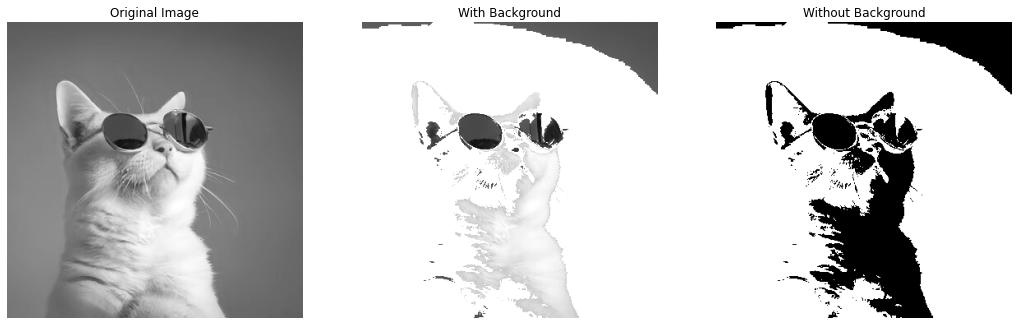

In [32]:
#grayscale slicing with and without background image
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def read_image_file(root_directory):
    filename = input("Enter an image file name: ")
    filepath = os.path.join(root_directory, filename)
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale mode
    if img is None:
        print(f"Error: Unable to read image from file {filepath}")
    return img

def gray_level_slicing(image, low, high, highlight_value=255, background_value=None):
    # Create a copy of the input image to retain unchanged parts
    sliced_image = image.copy()
   
    # Apply gray level slicing
    sliced_image[(image >= low) & (image <= high)] = highlight_value
   
    # If background_value is specified, set pixels outside the range to background_value
    if background_value is not None:
        sliced_image[(image < low) | (image > high)] = background_value
   
    return sliced_image

# Read the image file
image = read_image_file("Image")

# Check if the image was successfully read
if image is not None:
    # Define the range of gray levels to highlight
    low, high = 100, 200

    # Apply gray level slicing without background
    sliced_image_without_background = gray_level_slicing(image, low, high, highlight_value=255, background_value=0)

    # Apply gray level slicing with background
    sliced_image_with_background = gray_level_slicing(image, low, high, highlight_value=255)

    # Display the original and processed images using Matplotlib
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Original image
    axs[0].imshow(image, cmap='gray')
    axs[0].set_title("Original Image")
    axs[0].axis('off')

    # Processed image with gray level slicing and background
    axs[1].imshow(sliced_image_with_background, cmap='gray')
    axs[1].set_title("With Background")
    axs[1].axis('off')

    # Processed image with gray level slicing without background
    axs[2].imshow(sliced_image_without_background, cmap='gray')
    axs[2].set_title("Without Background")
    axs[2].axis('off')

    plt.show()
else:
    print("Failed to read the image. Please check the file path and try again.")